In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 03

## Exercise 03.1

### 1. 

Implement an algorithm that uses momentum gradient and combine this with the mini-batch gradient descent.

First, construct again a data set:

In [2]:
sigma = 2000
theta_true = [3000, 5000]
def true_model(x):
    return theta_true[0] * x + theta_true[1]
xs = np.linspace(0, 10, 200)
data = [[x, true_model(x) + np.random.normal(0, sigma)] for x in xs]

rand_ind_set = np.random.choice(range(200), 160, replace=False)

training_data = np.array([data[n] for n in rand_ind_set])

def sort_func(x):
    if x in rand_ind_set:
        return False
    else:
        return True
ind_set_compl = list(filter(sort_func, range(200)))
test_data = np.array([data[n] for n in ind_set_compl])

Definition of gradient and descent method:

In [3]:
def grad_MSE_mini_batch(theta, data_set, batch_size):
    N =  len(data_set)
    rand_ind_set = np.random.choice(range(N), batch_size, replace=False)
    MSE_a = 0
    MSE_b = 0
    for i in rand_ind_set:
        MSE_a += (2/batch_size) * (theta[0] * data_set[i, 0] + theta[1] - data_set[i, 1]) * data_set[i, 0]
        MSE_b += (2/batch_size) * (theta[0] * data_set[i, 0] + theta[1] - data_set[i, 1])
    return np.array([MSE_a, MSE_b])

def mini_batch_grad_desc(data_set, batch_size, theta_initial, learning_rate, conv_criterion, max_iterations, damping):
    pts = [theta_initial]
    mom = [0.0]
    for i in range(max_iterations):
        if np.linalg.norm(grad_MSE_mini_batch(pts[i], data_set, batch_size)) <  conv_criterion:
            return np.array(pts), 'Convergence reached'
        mom.append(damping * mom[i] - learning_rate * grad_MSE_mini_batch(pts[i], data_set, batch_size))
        pts.append(pts[i] + mom[i+1])
    return np.array(pts), 'Maximum iterations reached' 

### 2. 

Let's compute the gradient descent with batch_size = 20 starting with a 'bad' initial guess at theta_initial = [0, -10000]

In [4]:
def mean_squared_error(theta, data_set):
    data_set
    N = len(data_set)
    MSE = 0
    for i in range(N):
        MSE += (1/N) * (data_set[i, 1] - (theta[0] * data_set[i, 0] + theta[1]))**2
    return MSE

theta_0s = np.linspace(-1000, 10000, 100)
theta_1s = np.linspace(-12000, 10000, 100)
#MSE_vals = np.array([mean_squared_error([a, b], training_data) for a in theta_0s for b in theta_1s])

A, B = np.meshgrid(theta_0s, theta_1s)
Z = mean_squared_error([A,B], training_data)

In [5]:
path_1 = mini_batch_grad_desc(training_data, 20, [0, -10000], 0.0005, 1e-4, 30000, 0.3)[0]

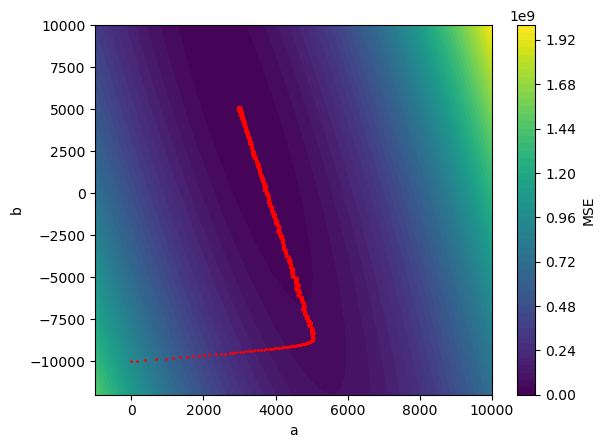

In [6]:
plt.contourf(A, B, Z, 60)
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(label='MSE')
plt.plot(path_1[:,0], path_1[:,1], 'ro', markersize=1)
plt.show()

The batch size determines how sharp the path is. If we set batch_size = 1, then the descent still works quite well but shows larger uncertainties. 

Lower learning rate seems to render the curve also sharper

If we keep the momentum high, we see stronger oscillations of the path that do not die off.

### 3.

Introducing a learning rate schedule:

In [7]:
def mini_batch_grad_desc_schedule(data_set, batch_size, theta_initial, init_learning_rate, learning_drop, learning_drop_step, conv_criterion, max_iterations, damping):
    pts = [theta_initial]
    mom = [0.0]
    for i in range(max_iterations):
        if np.linalg.norm(grad_MSE_mini_batch(pts[i], data_set, batch_size)) <  conv_criterion:
            return np.array(pts), 'Convergence reached'
        mom.append(damping * mom[i] - init_learning_rate * (learning_drop ** (i/learning_drop_step)) * grad_MSE_mini_batch(pts[i], data_set, batch_size))
        pts.append(pts[i] + mom[i+1])
    return np.array(pts), 'Maximum iterations reached' 

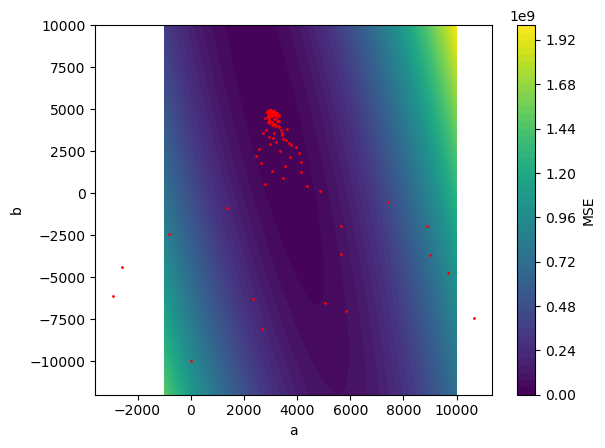

In [14]:
fast_path = mini_batch_grad_desc_schedule(training_data, 20, [0, -10000], 0.05, 0.5, 50, 1e-2, 200, 0.6)[0]
plt.plot(fast_path[:,0], fast_path[:,1], 'ro', markersize=1)
plt.contourf(A, B, Z, 60)
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(label='MSE')
plt.show()

## Exercise 03.2

In [15]:
import sklearn.datasets
iris_dict = sklearn.datasets.load_iris()
iris_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
iris_dict['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
data_set = [iris_dict['data'], iris_dict["target"]]
rand_ind_set_setosa = np.random.choice(range(50), 40, replace=False)
rand_ind_set_versicolor = np.random.choice(range(50, 100), 40, replace=False)
rand_ind_set_virginica = np.random.choice(range(100, 150), 40, replace=False)
rand_ind_set = [*rand_ind_set_setosa, *rand_ind_set_versicolor, *rand_ind_set_virginica]

def sort_func(x):
    if x in rand_ind_set:
        return False
    else:
        return True
ind_set_compl = list(filter(sort_func, range(150)))

training_data = [[data_set[0][ind], data_set[1][ind]] for ind in rand_ind_set]
test_data = [[data_set[0][ind], data_set[1][ind]] for ind in ind_set_compl]


In [17]:
data_pairs_training = [np.array([[training_data[n][0][i],training_data[n][0][j]] for n in range(120)]) for i in range(4) for j in range(4) if i < j]
data_pairs_test = [np.array([[test_data[n][0][i], test_data[n][0][j]] for n in range(30)]) for i in range(4) for j in range(4) if i < j]
colors = ['red', 'yellow', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
measurements = ['sepal length [cm]', 'sepal width[cm]', 'petal length [cm]', 'petal width [cm]']
measurement_labels = [[measurements[i], measurements[j]] for i in range(4) for j in range(4) if i < j]
ranges_training = [slice(0, 40), slice(40, 80), slice(80, 120)]
ranges_test = [slice(0,10), slice(10, 20), slice(20, 30)]
plt_position = [[i, j] for i in range(2) for j in range(3)]

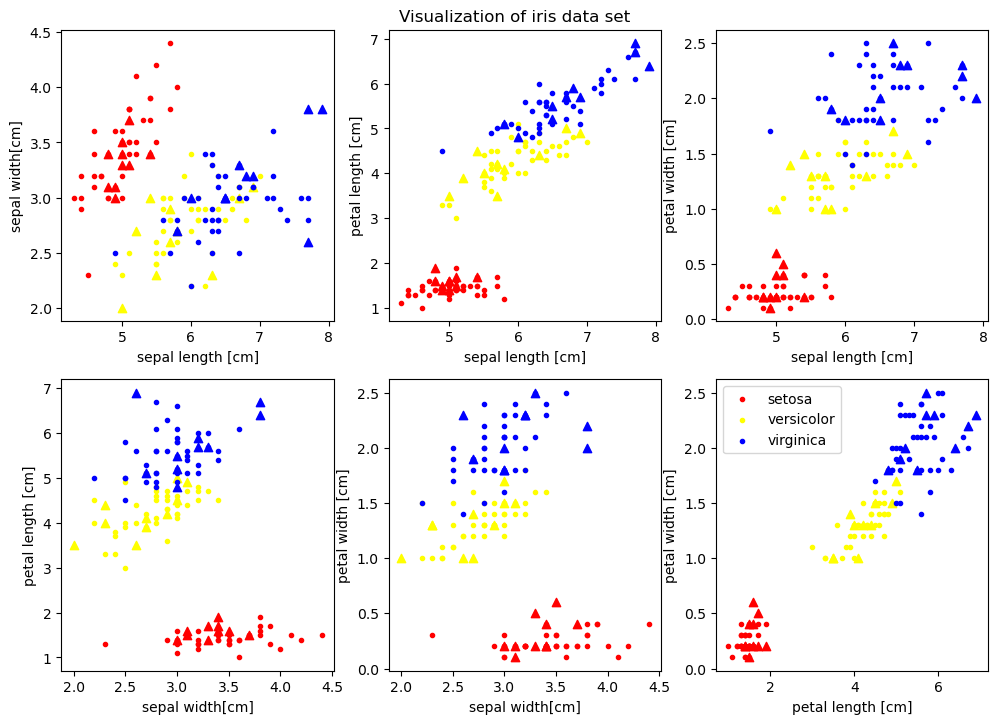

In [153]:
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
fig.tight_layout()

for i, pos in enumerate(plt_position):
    for t in range(3):
        ax[pos[0], pos[1]].scatter(np.array(data_pairs_training[i])[ranges_training[t], 0], np.array(data_pairs_training[i])[ranges_training[t], 1], marker='.', color=colors[t], label=labels[t])
        ax[pos[0], pos[1]].scatter(np.array(data_pairs_test[i])[ranges_test[t], 0], np.array(data_pairs_test[i])[ranges_test[t], 1], marker='^', color=colors[t])
        ax[pos[0], pos[1]].set_xlabel(measurement_labels[i][0])
        ax[pos[0], pos[1]].set_ylabel(measurement_labels[i][1])

plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle('Visualization of iris data set', y=1.0)
plt.legend()
plt.show()


From the plots we can tell already that the setosa type is easily distinguished from the other two types in almost every plot. To distinguish between versicolor and virginica is more complicated as the points lie closer together. The best distinction can probably be made with the petal_width - petal_length set.

### 3.

Let's create a decision tree for the data

In [18]:
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

In [19]:
clf = tree.DecisionTreeClassifier(random_state=14)
class_list = [*[0 for i in range(40)], *[1 for i in range(40)], *[2 for i in range(40)]]
tree_fit = tree.DecisionTreeClassifier(random_state=14).fit(np.array(data_pairs_training[0]), np.array(class_list))

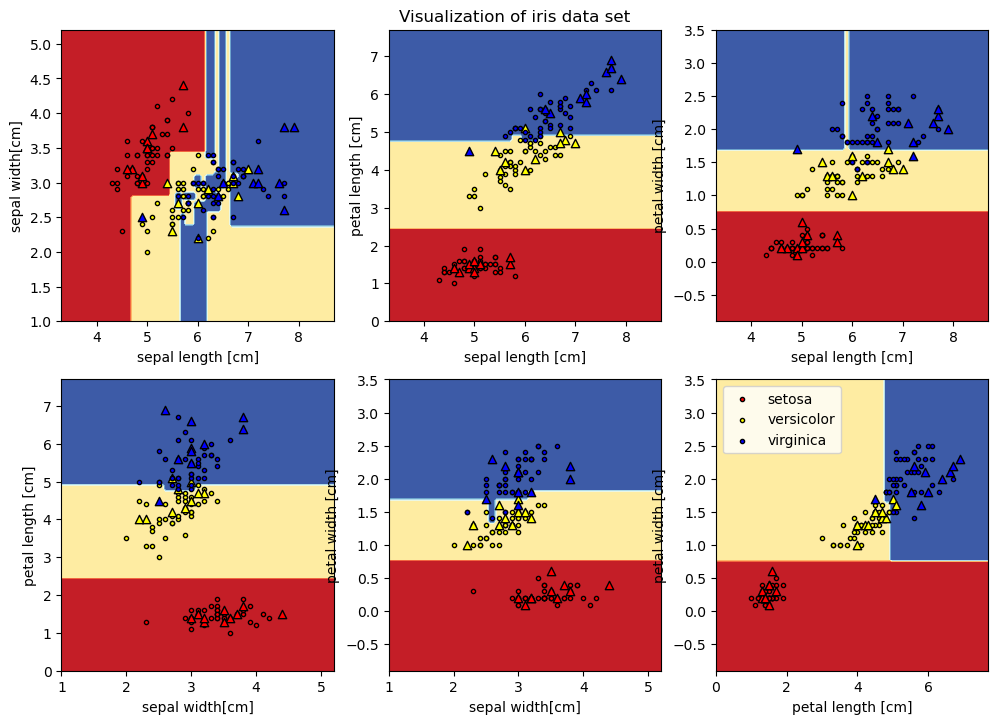

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
fig.tight_layout()

for i, pos in enumerate(plt_position):
    for t in range(3):
        tree_fit = tree.DecisionTreeClassifier(random_state=14).fit(np.array(data_pairs_training[i]), np.array(class_list))
        DecisionBoundaryDisplay.from_estimator(tree_fit, 
                                               data_pairs_training[i], 
                                               cmap=plt.cm.RdYlBu, 
                                               plot_method='contourf',
                                               response_method='predict',  
                                               ax=ax[pos[0], pos[1]], 
                                               xlabel=measurement_labels[i][0], 
                                               ylabel=measurement_labels[i][1])
        
for i, pos in enumerate(plt_position):
    for t in range(3):
        ax[pos[0], pos[1]].scatter(np.array(data_pairs_training[i])[ranges_training[t], 0], np.array(data_pairs_training[i])[ranges_training[t], 1], marker='.', color=colors[t], edgecolor='black', label=labels[t])
        ax[pos[0], pos[1]].scatter(np.array(data_pairs_test[i])[ranges_test[t], 0], np.array(data_pairs_test[i])[ranges_test[t], 1], marker='^', edgecolor='black', color=colors[t])
        ax[pos[0], pos[1]].set_xlabel(measurement_labels[i][0])
        ax[pos[0], pos[1]].set_ylabel(measurement_labels[i][1])


plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.suptitle('Visualization of iris data set', y=1.0)
plt.legend()
plt.show()

We observe that the first data pair leads to complicated boundaries that seem to be overfitted. Instead, the sixth decision tree seems to nicely distinguish between the three different classes. We also see that the test data lies nicely within the corresponding regions, thus generalization seems to be good.

In [44]:
tree_fit = tree.DecisionTreeClassifier(random_state=14).fit(np.array([training_data[n][0] for n in range(120)]), [training_data[n][1] for n in range(120)])
class_pred = tree_fit.predict(np.array([test_data[n][0] for n in range(30)]))
class_actual = np.array([test_data[n][1] for n in range(30)])


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(class_pred, class_actual, normalize=False)

27.0

27/30 (or 90%) classifications are correct with the decision tree method.

[Text(0.3333333333333333, 0.9166666666666666, 'x[3] <= 0.75\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.25, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.41666666666666663, 0.8333333333333333, '  False'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.13\nsamples = 43\nvalue = [0, 3, 40]'),
 Text(0.5, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6666666666666666, 0.25, 'x[1] <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 

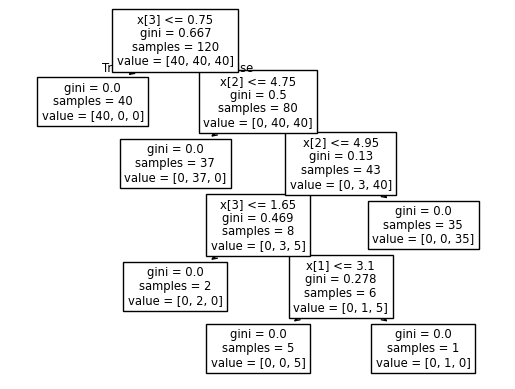

In [47]:
sklearn.tree.plot_tree(tree_fit)